### Term Deposit Marketing


The goal of this project is to build a machine learning model that can distinguish between the both classes **Subscribe or Not Subscribe** in the **y** column.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("term-deposit-marketing-2020.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
df.shape

(40000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [8]:
## Converting (yes, no) to (1,0) for these columns
df.default.replace(("yes", "no"), (1,0), inplace=True)
df.housing.replace(("yes", "no"), (1, 0), inplace=True)
df.loan.replace(("yes", "no"), (1, 0), inplace=True)
df.y.replace(("yes", "no"), (1, 0), inplace=True)

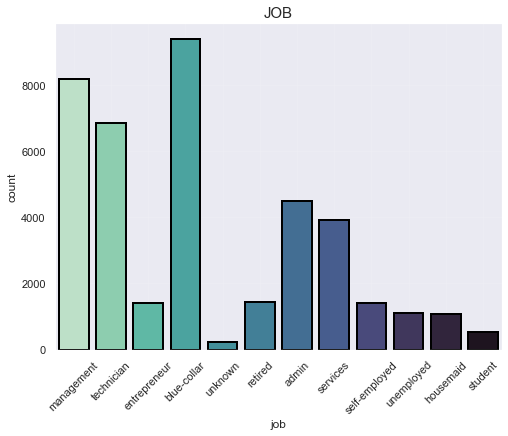

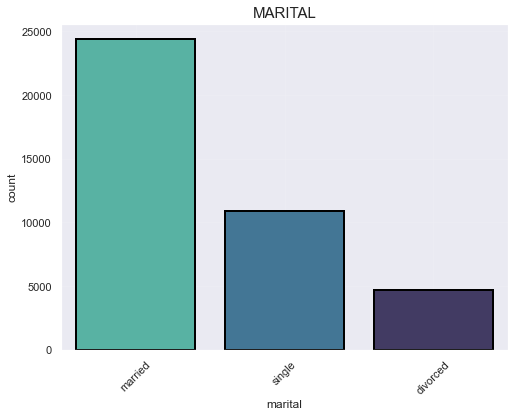

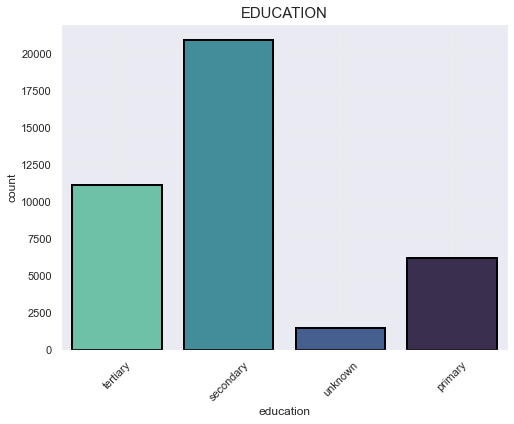

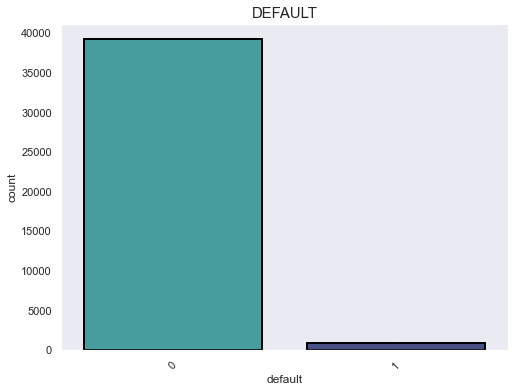

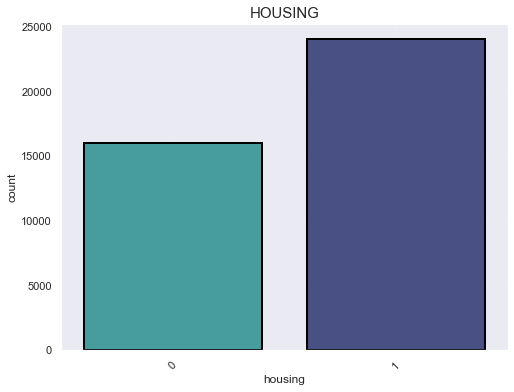

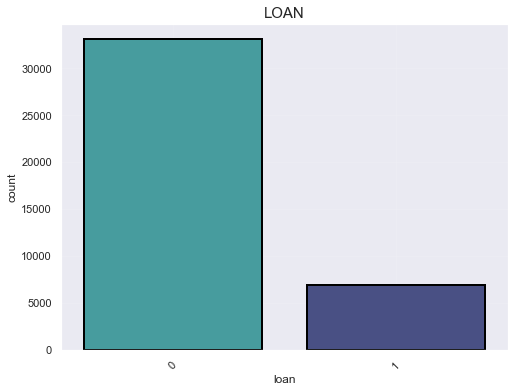

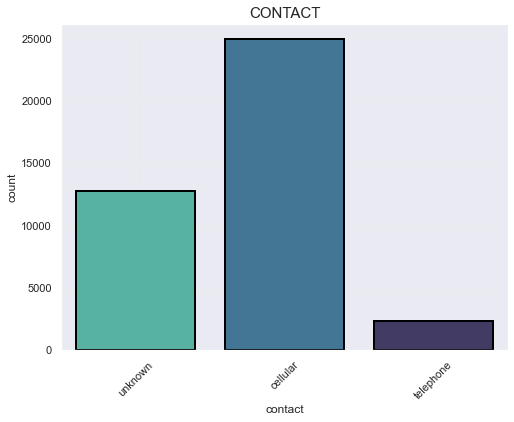

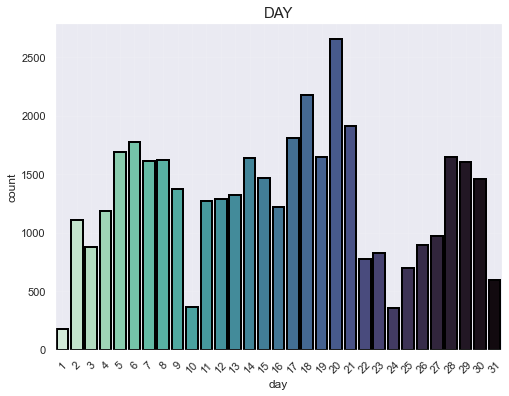

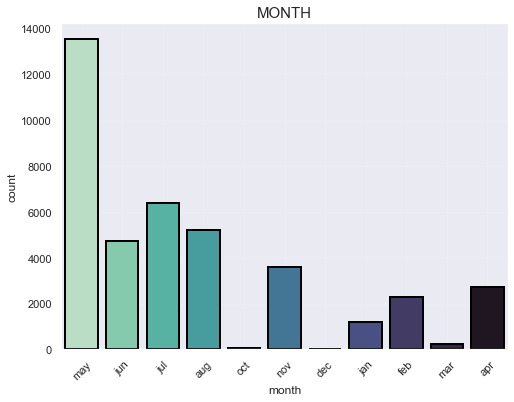

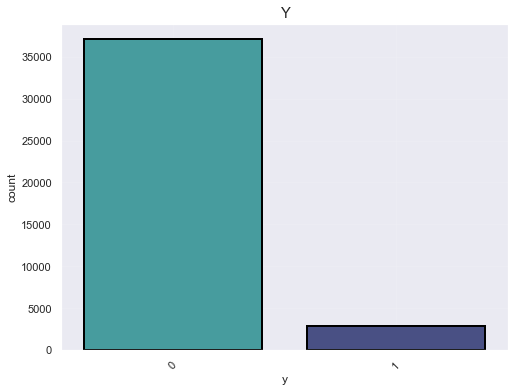

In [9]:
numerical_col = ["age", "balance", "duration", "campaign"]
for col in df.columns:
    if col not in numerical_col:
        sns.set(rc={"figure.figsize":(8,6)})
        sns.countplot(x=col, data=df, palette="mako_r", edgecolor="black", linewidth=2)
        plt.title(col.upper(), fontsize=15)
        plt.grid(alpha=0.1)
        plt.xticks(rotation=45)
        plt.show();

####  Age and Duration distribution

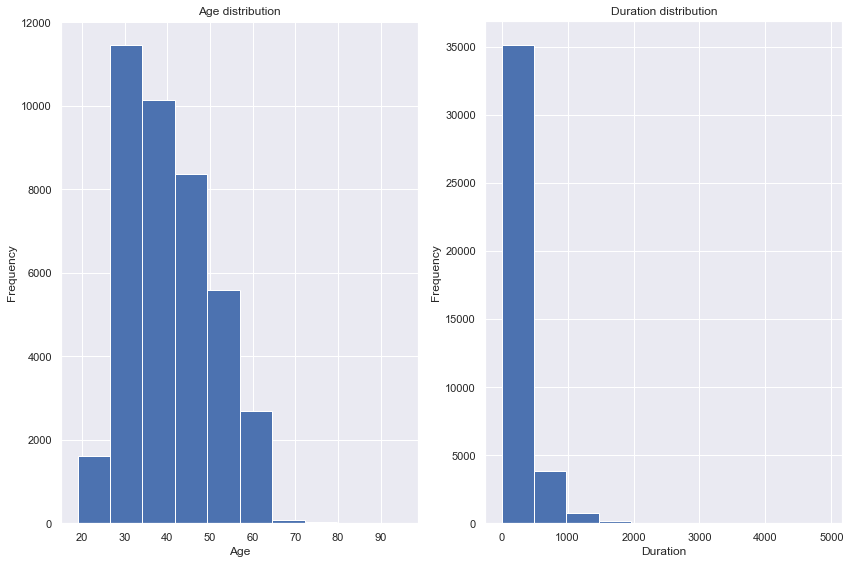

In [10]:
fig, axis=plt.subplots(nrows=1, ncols = 2, figsize=(12,8))
df["age"].plot.hist(ax=axis[0]).set(xlabel="Age", title="Age distribution")
df["duration"].plot.hist(ax=axis[1]).set(xlabel="Duration", title="Duration distribution")
plt.tight_layout()
plt.show();

In [11]:
def count_on(on):
    viz= sns.countplot(df[on],  palette= 'coolwarm')
    viz.set(title= f'Count of {on}', xlabel= f'{on}')

### Checking if the Target variable is balance


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


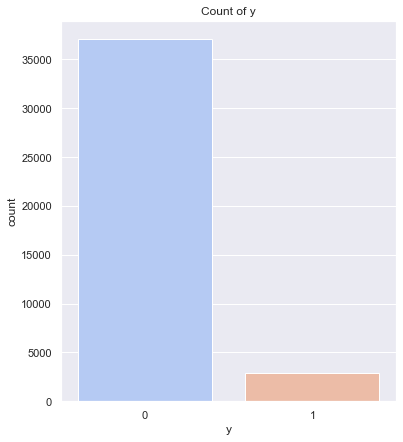

In [12]:
plt.figure(figsize=(6,7))
count_on("y")

### Education VS Age and Target

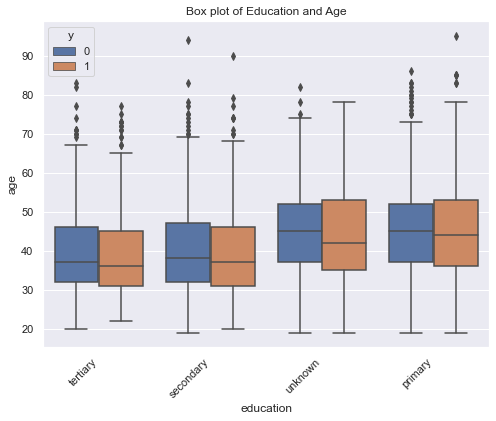

In [13]:
plot = sns.boxplot(x= "education", y="age", hue="y", data= df)
plt.xticks( rotation=45, horizontalalignment='right' )
plot.set_title(f'Box plot of Education and Age');

## Marital VS Age & Target

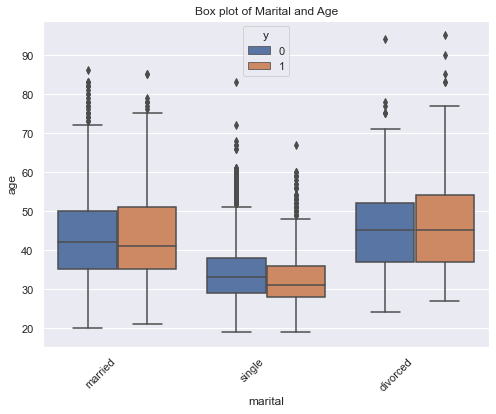

In [14]:
plot = sns.boxplot(x= "marital", y="age", hue="y", data= df)
plt.xticks( rotation=45, horizontalalignment='right' )
plot.set_title(f'Box plot of Marital and Age');

### Preprocessing and Pipelines

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [16]:
num_attr = ['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign']
cat_attr = ['job', 'marital', 'education', 'contact', 'month']

df_num= df[num_attr]
df_cat = df[cat_attr]

df =df_num.join(df_cat).join(df["y"])

In [17]:
age_index = 0
duration_index = 6

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE

In [19]:
class log_transformer(BaseEstimator, TransformerMixin):
    def __init__(self, transformAge = True, transformDuration = True):
        self.transformAge = transformAge
        self.transformDuration = transformDuration
    def fit(self, y=None):
        return self
    def transform(self, X, y=None):
        logAge = np.log(X.iloc[:, age_index].astype("int64"))
        logDuration = np.log(X.iloc[:, duration_index].astype("int64") + 1)
        if (self.transformAge and self.transformDuration):
            return np.c_[logAge, X.iloc[:,1:duration_index], logDuration, X.iloc[:,duration_index+1::]]
        elif self.transformAge:
            return np.c_[logAge, X.iloc[:,1::]]
        elif self.transformDuration:
            return np.c_[X.iloc[:,0:duration_index], logDuration, X.iloc[:,duration_index+1::]]
        else:
            return X

In [20]:
num_pipeline =Pipeline([
    ("log_adder", log_transformer()),
    ("std_scaler", StandardScaler())
])

In [21]:
complete_pipeline =ColumnTransformer([
    ("numerical", num_pipeline, num_attr),
    ("catgorical", OneHotEncoder(), cat_attr)
])

In [22]:
#Since the data is unbalanced, i will split the training and test set using StratifiedShuffleSplit balancing y column
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(df, df["y"]):
    df_train = df.loc[train_index]
    df_test =df.loc[test_index]

In [23]:
X_train = df_train.drop("y", axis=1)
y_train = df_train["y"]
X_test =df_test.drop("y", axis=1)
y_test =df_test["y"]

In [24]:
df_train.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'job', 'marital', 'education', 'contact', 'month', 'y'],
      dtype='object')

In [25]:
complete_pipeline.fit(X_train)
X_train_transformed  =complete_pipeline.transform(X_train)
X_test_transformed =complete_pipeline.transform(X_test)

In [26]:
## Oversampling the minority class
smote =SMOTE()
X_train_smote, y_train_smote =smote.fit_resample(X_train_transformed, y_train)

In [27]:
len(X_train_smote)

59366

In [28]:
X_train_transformed.shape

(32000, 41)

### Model Training

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth= 2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

###  1. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr_params ={
    "solver" :["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "C" :[5,10,20]
}

lr = LogisticRegression(verbose=3)
lr_model = GridSearchCV(lr, lr_params, scoring="roc_auc", cv=5, n_jobs=-3, verbose=3)
lr_model.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 10 seconds


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(verbose=3), n_jobs=-3,
             param_grid={'C': [5, 10, 20],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc', verbose=3)

In [31]:
lr_predictions = lr_model.predict(X_train_smote)
lr_probs = lr_model.predict_proba(X_train_smote)
print("Logistic Regression Best Score : " + "{:.2f}%".format(lr_model.best_score_*100))
print("Logistic Regression Accuracy: " + "{:.2f}%".format(100*np.array(lr_predictions == y_train_smote).sum() / len(X_train_smote)))
print("Logistic Regression Precision Score: " + "{:.2f}%".format(100*precision_score(y_train_smote, lr_predictions)))
print("Logistic Regression Recall Score: " + "{:.2f}%".format(100*recall_score(y_train_smote, lr_predictions)))

Logistic Regression Best Score : 93.74%
Logistic Regression Accuracy: 87.92%
Logistic Regression Precision Score: 85.83%
Logistic Regression Recall Score: 90.83%


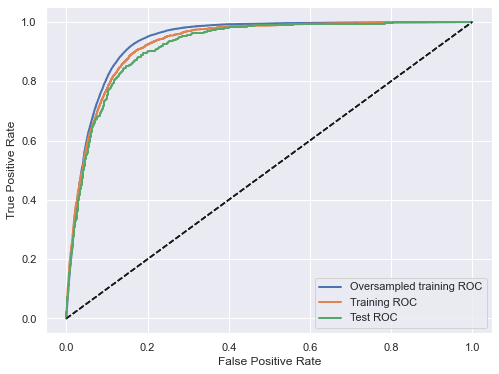

In [32]:
fpr_lr_smote, tpr_lr_smote, thresholds_lr_smote=roc_curve(y_train_smote, lr_probs[:,1])
fpr_lr, tpr_lr, thresholds_lr =roc_curve(y_train, lr_model.predict_proba(X_train_transformed)[:,1])
fpr_lr_test, tpr_lr_test, thresholds_lr_test =roc_curve(y_test, lr_model.predict_proba(X_test_transformed)[:,1])
plot_roc_curve(fpr_lr_smote, tpr_lr_smote, label="Oversampled training ROC")
plot_roc_curve(fpr_lr, tpr_lr, label="Training ROC")
plot_roc_curve(fpr_lr_test, tpr_lr_test,label="Test ROC")
plt.legend(loc="lower right")
plt.show();

###  2. Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model =RandomForestClassifier(n_estimators=1000, max_depth=8, verbose=0)
rf_model.fit(X_train_smote, y_train_smote)
cross_val_score(rf_model, X=X_train_smote,
               y=y_train_smote, 
               scoring="roc_auc",
               cv=5,
               n_jobs=-3,
               verbose=0)

array([0.96132631, 0.97679073, 0.97984256, 0.97973916, 0.97763228])

In [34]:
rf_predictions =rf_model.predict(X_train_smote)
rf_probs = rf_model.predict_proba(X_train_smote)
print("Random Forest ROC_AUC : " + "{:.2f}%".format(roc_auc_score(y_train_smote, rf_probs[:,1])*100))
print("Random Forest Accuracy: " + "{:.2f}%".format(100*np.array(rf_predictions == y_train_smote).sum() / len(X_train_smote)))
print("Random Forest Precision Score: " + "{:.2f}%".format(100*precision_score(y_train_smote, rf_predictions)))
print("Random Forest Recall Score: " + "{:.2f}%".format(100*recall_score(y_train_smote, rf_predictions)))

Random Forest ROC_AUC : 97.83%
Random Forest Accuracy: 92.35%
Random Forest Precision Score: 90.33%
Random Forest Recall Score: 94.86%


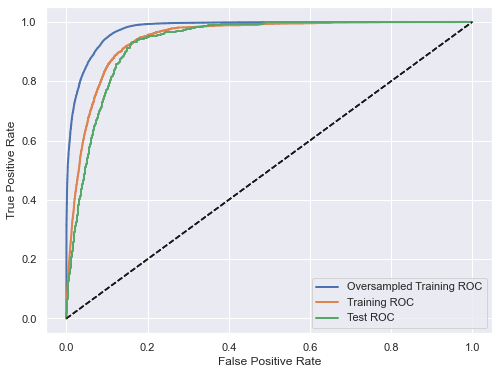

In [35]:
fpr_rf_smote, tpr_rf_smote, thresholds_rf_smote = roc_curve(y_train_smote, rf_probs[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, rf_model.predict_proba(X_train_transformed)[:,1])
fpr_rf_test, tpr_rf_test, thresholds_rf_test = roc_curve(y_test, rf_model.predict_proba(X_test_transformed)[:,1])
plot_roc_curve(fpr_rf_smote, tpr_rf_smote, label="Oversampled Training ROC")
plot_roc_curve(fpr_rf, tpr_rf, label="Training ROC")
plot_roc_curve(fpr_rf_test, tpr_rf_test, label="Test ROC")
plt.legend(loc="lower right")
plt.show()

### 3.XGBoost

In [36]:
import xgboost

xgb_model = xgboost.XGBClassifier(objective='binary:logistic',min_child_weight=10, subsample=0.35, colsample_bytree=0.35, max_depth=3, learning_rate=0.01, n_estimators=1000,silent=True, nthread=-3)
xgb_model.fit(X_train_smote, y_train_smote)
cross_val_score(xgb_model, X=X_train_smote, y=y_train_smote, scoring="roc_auc", cv = 5, n_jobs=-3, verbose=0)

[10:54:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




array([0.96593913, 0.98341069, 0.98629554, 0.98501653, 0.98405401])

In [37]:
xgb_predictions = xgb_model.predict(X_train_smote)
xgb_probas = xgb_model.predict_proba(X_train_smote)
print("XGBoost ROC_AUC : " + "{:.2f}%".format(roc_auc_score(y_train_smote, xgb_probas[:,1])*100))
print("XGBoost Accuracy: " + "{:.2f}%".format(100*np.array(xgb_predictions == y_train_smote).sum() / len(X_train_smote)))
print("XGBoost Precision Score: " + "{:.2f}%".format(100*precision_score(y_train_smote, xgb_predictions)))
print("XGBoost Forest Recall Score: " + "{:.2f}%".format(100*recall_score(y_train_smote, xgb_predictions)))

XGBoost ROC_AUC : 98.29%
XGBoost Accuracy: 93.17%
XGBoost Precision Score: 91.96%
XGBoost Forest Recall Score: 94.62%


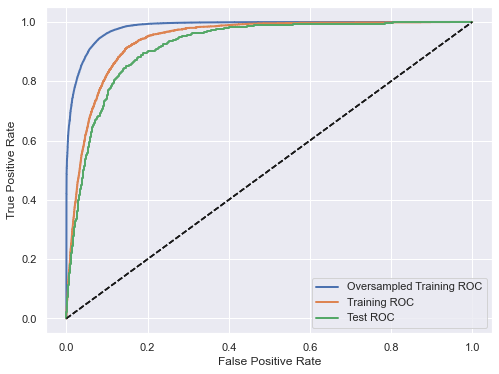

In [38]:
fpr_xgb_smote, tpr_xgb_smote, thresholds_xgb_smote = roc_curve(y_train_smote, xgb_probas[:,1])
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_train, xgb_model.predict_proba(X_train_transformed)[:,1])
fpr_xgb_test, tpr_xgb_test, thresholds_xgb_test = roc_curve(y_test, xgb_model.predict_proba(X_test_transformed)[:,1])
plot_roc_curve(fpr_xgb_smote, tpr_xgb_smote, label="Oversampled Training ROC")
plot_roc_curve(fpr_xgb, tpr_xgb, label = "Training ROC")
plot_roc_curve(fpr_lr_test, tpr_lr_test, label= "Test ROC")
plt.legend(loc="lower right")
plt.show()

### Deciding Final Mode

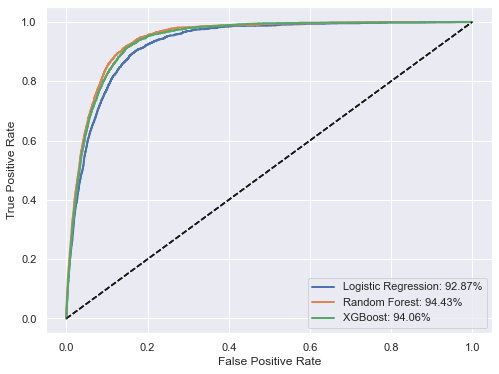

In [39]:
plot_roc_curve(fpr_lr, tpr_lr, label = "Logistic Regression: {:.2f}%".format(roc_auc_score(y_train, lr_model.predict_proba(X_train_transformed)[:,1])*100))
plot_roc_curve(fpr_rf, tpr_rf, label = "Random Forest: {:.2f}%".format(roc_auc_score(y_train, rf_model.predict_proba(X_train_transformed)[:,1])*100))
plot_roc_curve(fpr_xgb, tpr_xgb, label = "XGBoost: {:.2f}%".format(roc_auc_score(y_train, xgb_model.predict_proba(X_train_transformed)[:,1])*100))
plt.legend(loc="lower right")
plt.show()

Considering training set, Random forest model seems just a little better also when Recall is around 90%

### Feature Importances

In [49]:
features = list(num_attr) + list(complete_pipeline.named_transformers_['catgorical'].get_feature_names())

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
importances =pd.DataFrame(columns=["Feature", "Importance"])
importances["Feature"]=features
importances["Importance"]=rf_model.feature_importances_

In [42]:
importances.sort_values(by="Importance", ascending=False).head(20)

,Feature,Importance
6,duration,0.526929
7,campaign,0.082119
27,x3_cellular,0.048047
30,x4_apr,0.042696
29,x3_unknown,0.035617
37,x4_mar,0.028364
2,balance,0.025199
5,day,0.022466
21,x1_married,0.016314
3,housing,0.012731


### Which Customers are more likely to buy? (Customer Segmentation)

 * Age: People are significantly more likely to subscribe at their later ages(60+) and they are more likely to subsribe at early(20-35) ages. The ages in between, they are less likely to subscribe.

 * Default: Default information is not a very good predictor

 * Balance: People with higher balance has more chances of subscribing. In dataset, there are lots of people with zero balance(probably does not have account on bank), the people with zero balance are less likely to subscribe. (It can be people with no account as well because they will probably depositing on a bank in which they allready have an account.)

 * Housing: The people without a housing loan are more likely to subscribe

 * Loan: Loan information is not a very good predictor.

 * Job: Management levels are more likely and Blue Collars are less likely to subscribe.

 * Marital: Single people are more likely and Married people are less likely to subscribe.

 * Education: People with tertiary education are more likely to subscribe, other education types does are not very significant predictors.

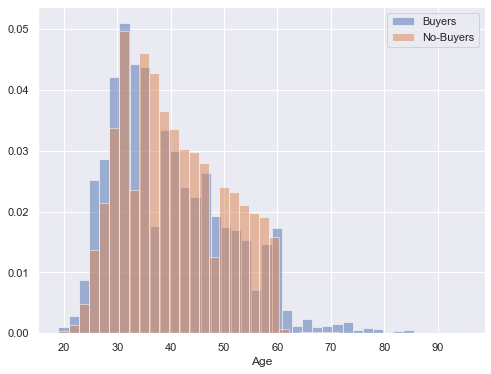

In [43]:
age_data = df[['age','y']]
buyers = age_data[age_data['y']==1]
no_buyers = age_data[age_data['y']==0]
plt.hist(buyers['age'], bins=40, alpha=0.5, density=True, label='Buyers')
plt.hist(no_buyers['age'], bins=40, alpha=0.5, density=True, label = 'No-Buyers')
plt.legend(loc="upper right")
plt.xlabel("Age")
plt.show()

**What makes customers buy?**

The most significant features that makes customers buy are:

In the exploratory data analysis section, we have observed some features that has higher sale rates than others.

I am now going to combine EDA with feature importance values that is given by the model to answer What makes customer buy?

1. Duration: Longer calls more likely ending up in sales. You can find the visual evidence for this suggestion below.

2. Contact Type: Cellular contacts more likely ending up in sales. Model suggests this feature is important and you can find the analysis for this on EDA section.

3. Month: The contact month also affecting the sales. October and March has higher sale rates than other months followed by april and february. But notice that March has fewer observation than others and October has very few observations. Therefore model thinks month's beign october does not have any significant effect on sales. Need to observe more values to be able to say something about October.

### Duration

In [44]:
duration_data = df[['duration','y']]
buyers = duration_data[duration_data['y']==1]
no_buyers = duration_data[duration_data['y']==0]

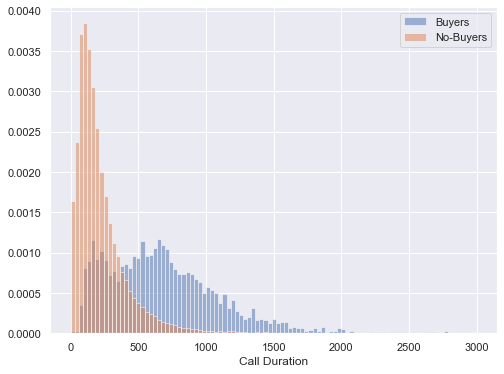

In [45]:
bins = np.linspace(0,3000,100)
plt.hist(buyers['duration'], bins=bins, alpha=0.5, density=True, label='Buyers')
plt.hist(no_buyers['duration'], bins=bins, alpha=0.5, density=True, label = 'No-Buyers')
plt.legend(loc="upper right")
plt.xlabel("Call Duration")
plt.show()

The call durations of No-buyers are left-skewed and most observations are at lower durations.

There are not many observations of long call durations for no-buyers.

On the other hand, the call durations of Buyers are more spread-out to higher calls.

This means that there is a correlation between Call duration and Subscribing.

It can be either longer duration calls more likely to end up with sale or(/and) the if the sale is made on phone and after the sale more talking is required then the calls that ended up in sales might cause the duration to be longer. But this information is not given in the problem.

### Balance

In [46]:
balance_data = df[['balance','y']]
buyers = balance_data[balance_data['y']==1]
no_buyers = balance_data[balance_data['y']==0]

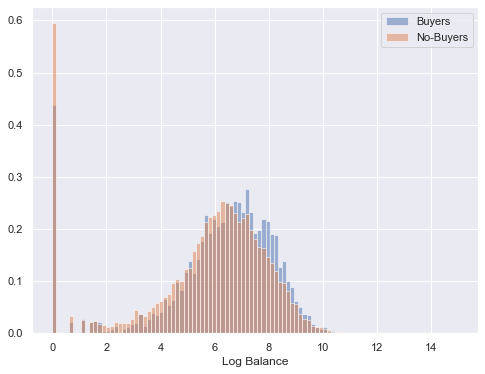

In [48]:
bins = np.linspace(0,15,100)
plt.hist(np.log(buyers['balance']+1), bins=bins, alpha=0.5, density=True, label='Buyers')
plt.hist(np.log(no_buyers['balance']+1), bins=bins, alpha=0.5, density=True, label = 'No-Buyers')
plt.legend(loc="upper right")
plt.xlabel("Log Balance")
plt.show()